In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from nltk.corpus import wordnet as wn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score
import seaborn as sns

In [ ]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
np.random.seed(500)

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/Data/Final_dataset.csv')

In [ ]:
dataset.head()

,Unnamed: 0,Post,Suicidal_label,Sentiment_label
0,0,Ex Wife Threatening SuicideRecently I left my ...,0,0
1,1,Am I weird I don t get affected by compliments...,1,1
2,2,Finally is almost over So I can never hear ...,1,0
3,3,i need helpjust help me im crying so hard,0,0
4,4,I m so lostHello my name is Adam and I ve b...,0,0


In [ ]:
data, extra = model_selection.train_test_split(dataset, test_size=0.6, random_state=0, 
                               stratify=dataset.Suicidal_label)

In [ ]:
data

,Unnamed: 0,Post,Suicidal_label,Sentiment_label
60974,61036,Is it normal to have parents who don t respect...,1,0
175752,176345,I failed I fought the ender dragon in hardcor...,1,2
147467,148027,They were rightLoneliness really does kill,0,0
87944,88392,hello i m bored and procrastinating so ask me ...,1,0
198758,199455,idc what you say but looks do matter obv it is...,1,0
...,...,...,...,...
18371,18383,has got to be the worst year in the past yea...,0,2
224611,225343,i stood up for someone I stood up for her in a...,1,0
75468,75714,Posting here everyday until I m day Nove...,1,0
54799,54858,Short and simple I m doing it tonight I m a...,0,2


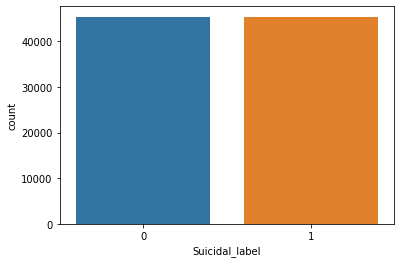

In [ ]:
sns.countplot(x='Suicidal_label',data=data)

In [ ]:
data = data.dropna()

## Pre-Processing
Remove Blank rows in Data, if any

Change all the text to lower case

Word Tokenization

Remove Stop words

Remove Non-alpha text

Word Lemmatization

In [ ]:
# Step - a : Remove blank rows if any.
data['Post'].dropna(inplace=True)
# Step - b : Change all the text to lower case. This is required as python interprets 'dog' and 'DOG' differently
data['Post'] = [str(entry).lower() for entry in data['Post']]
# Step - c : Tokenization : In this each entry in the corpus will be broken into set of words
data['Post']= [word_tokenize(str(entry)) for entry in data['Post']]

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:5258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

In [ ]:
# Step - d : Remove Stop words, Non-Numeric and perfom Word Stemming/Lemmenting.
# WordNetLemmatizer requires Pos tags to understand if the word is noun or verb or adjective etc. By default it is set to Noun
tag_map = defaultdict(lambda : wn.NOUN)
tag_map['J'] = wn.ADJ
tag_map['V'] = wn.VERB
tag_map['R'] = wn.ADV
for index,entry in enumerate(data['Post']):
    # Declaring Empty List to store the words that follow the rules for this step
    Final_words = []
    # Initializing WordNetLemmatizer()
    word_Lemmatized = WordNetLemmatizer()
    # pos_tag function below will provide the 'tag' i.e if the word is Noun(N) or Verb(V) or something else.
    for word, tag in pos_tag(entry):
        # Below condition is to check for Stop words and consider only alphabets
        if word not in stopwords.words('english') and word.isalpha():
            word_Final = word_Lemmatized.lemmatize(word,tag_map[tag[0]])
            Final_words.append(word_Final)
    # The final processed set of words for each iteration will be stored in 'text_final'
    data.loc[index,'Post_final'] = str(Final_words)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
data = data.dropna()

In [ ]:
data.Post_final=data.Post_final.astype(str)


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [ ]:
Train_X, Test_X, Train_Y, Test_Y, Train_Y1, Test_Y1 = model_selection.train_test_split(data['Post_final'],data['Suicidal_label'],data['Sentiment_label'],test_size=0.15)

In [ ]:
# Encoder = LabelEncoder()
# Train_Y = Encoder.fit_transform(Train_Y)
# Test_Y = Encoder.fit_transform(Test_Y)

In [ ]:
Tfidf_vect = TfidfVectorizer(max_features=8000)
Tfidf_vect.fit(data['Post_final'])
Train_X_Tfidf = Tfidf_vect.transform(Train_X)
Test_X_Tfidf = Tfidf_vect.transform(Test_X)

## Predicting Suicidal behaviour

In [ ]:
# Classifier - Algorithm - SVM
# fit the training dataset on the classifier
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(Train_X_Tfidf,Train_Y)
# predict the labels on validation dataset
predictions_SVM = SVM.predict(Test_X_Tfidf)

In [ ]:
# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM, Test_Y)*100)

SVM Accuracy Score ->  50.20242914979757


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

f1 = f1_score(Test_Y, predictions_SVM, average='weighted')
cm = confusion_matrix(Test_Y, predictions_SVM)
print("F1 score is:", f1)

F1 score is: 0.5018019751288537


In [ ]:
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

In [ ]:
cm

array([[0.48081181, 0.51918819],
       [0.47687225, 0.52312775]])

## Predicting Sentiment

In [ ]:
# Classifier - Algorithm - SVM
# fit the training dataset on the classifier
SVM_sent = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM_sent.fit(Train_X_Tfidf,Train_Y1)
# predict the labels on validation dataset
predictions_SVM_sent = SVM_sent.predict(Test_X_Tfidf)

In [ ]:
# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM_sent, Test_Y1)*100)

SVM Accuracy Score ->  68.20022083179977


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

f1 = f1_score(Test_Y1, predictions_SVM_sent, average='weighted')
cm = confusion_matrix(Test_Y1, predictions_SVM_sent)
print("F1 score is:", f1)

F1 score is: 0.5532127322176844
